In [2]:
import cv2 #import OpenCV
from matplotlib import pyplot as plt #import python plot graph
import matplotlib as mpl #import math library from python
import numpy as np

In [3]:
# load and show an image with Pillow
from PIL import Image
# Open the image form working directory
image = Image.open('TestImage.png')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()

PNG
(456, 766)
L


In [9]:
import sys
import numpy
from PIL import Image
from numpy import asarray
numpy.set_printoptions(threshold=sys.maxsize)
# load the image
image = Image.open('TestImage.png')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(766, 456)
<class 'PIL.Image.Image'>
L
(456, 766)


In [10]:
print(data)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

In [11]:
from __future__ import division
from PIL import Image
import math
import os

def long_slice(image_path, out_name, outdir, slice_size):
    """slice an image into parts slice_size tall"""
    img = Image.open(image_path)
    width, height = img.size
    upper = 0
    left = 0
    slices = int(math.ceil(height/slice_size))

    count = 1
    for slice in range(slices):
        #if we are at the end, set the lower bound to be the bottom of the image
        if count == slices:
            lower = height
        else:
            lower = int(count * slice_size)  

        bbox = (left, upper, width, lower)
        working_slice = img.crop(bbox)
        upper += slice_size
        #save the slice
        working_slice.save(os.path.join(outdir, "slice_" + out_name + "_" + str(count)+".png"))
        count +=1

if __name__ == '__main__':
    long_slice("TestImage.png","Testimage", os.getcwd(), 300)

In [12]:
import sys
import numpy
from PIL import Image
from numpy import asarray
image = Image.open('slice_Testimage_1.png')
print(image.size)

(456, 300)


In [15]:
import numpy as np
import PIL
an_image = PIL.Image.open("slice_Testimage_1.png")
image_sequence = an_image.getdata()
image_array = np.array(image_sequence)
count = 0
total = 0

for x in image_array:
    if x != 0:
        count+=1
        total+=x

print(total/count)

254.76403353406542


In [16]:
import numpy as np
import PIL
an_image = PIL.Image.open("slice_Testimage_2.png")
image_sequence = an_image.getdata()
image_array = np.array(image_sequence)
count = 0
total = 0

for x in image_array:
    if x != 0:
        count+=1
        total+=x

print(total/count)

254.34809332858535


In [18]:
import numpy as np
import PIL
an_image = PIL.Image.open("slice_Testimage_3.png")
image_sequence = an_image.getdata()
image_array = np.array(image_sequence)
count = 0
total = 0

for x in image_array:
    if x != 0:
        count+=1
        total+=x

print(total/count)

254.68996888846988


In [19]:
i = 0
i = 254.34809332858535/(254.76403353406542+254.34809332858535+254.68996888846988)
print(i)

0.33300261251373003


In [5]:
def display_image_actual_size_single(im_data):
    figuresize = get_figsize(im_data)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figuresize)
    # Add the single axis to fit the image to the screen boundary
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(im_data, cmap='gray')
    ax.axis('off')
    plt.show()
    return(fig)

In [6]:
def get_figsize(im):
    # What size does the figure need to be in inches to fit the image?
    dpi = plt.rcParams['figure.dpi']
    dim = im.shape
    figuresize = dim[1]/float(dpi), dim[0]/float(dpi)
    return(figuresize)

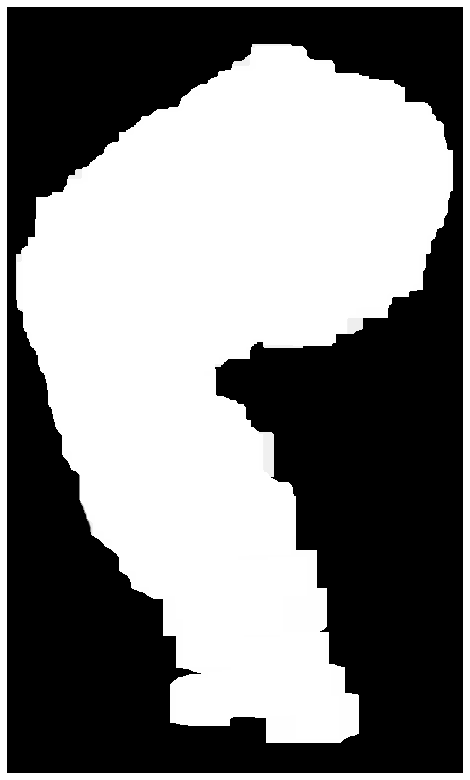

(766, 456, 3)


In [8]:
bg = cv2.imread('TestImage.png')
bg = cv2.cvtColor(bg,cv2.COLOR_BGR2RGB)
fig = display_image_actual_size_single(bg)
print(bg.shape)

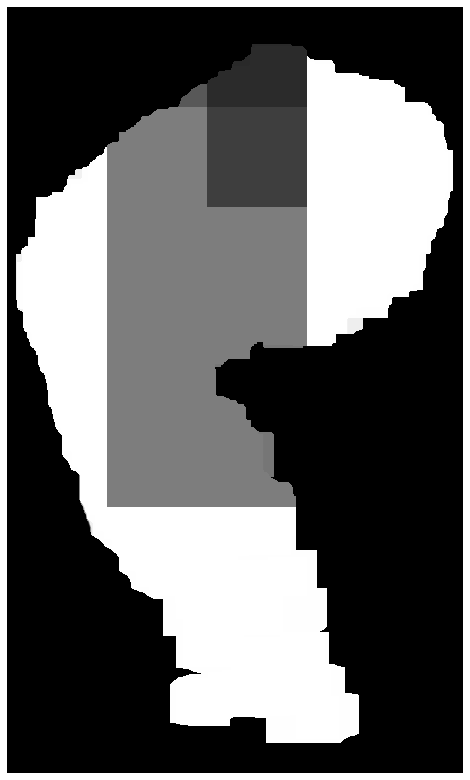

In [20]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi11 = bg[1:500, 100:300] 
b,g,r = cv2.split(roi11)
onecolorD = roi11.copy()
onecolorD[:,:,2] = 0
convertbgr2gray = cv2.cvtColor(onecolorD,cv2.COLOR_BGR2GRAY)
convertgray2bgr = cv2.cvtColor(convertbgr2gray,cv2.COLOR_GRAY2BGR)
# plt.imshow(cv2.cvtColor(onecolorD,cv2.COLOR_RGB2GRAY))
bg[1:500, 100:300] = convertgray2bgr
fig = display_image_actual_size_single(bg)


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('TestImage.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
crop = img[y:y+h,x:x+w]
cv2.imwrite('TestImageCrop.png',crop)


True

In [14]:
from __future__ import division
from PIL import Image
import math
import os

def long_slice(image_path, out_name, outdir, slice_size):
    """slice an image into parts slice_size tall"""
    img = Image.open(image_path)
    width, height = img.size
    upper = 0
    left = 0
    slices = int(math.ceil(height/slice_size))

    count = 1
    for slice in range(slices):
        #if we are at the end, set the lower bound to be the bottom of the image
        if count == slices:
            lower = height
        else:
            lower = int(count * slice_size)  

        bbox = (left, upper, width, lower)
        working_slice = img.crop(bbox)
        upper += slice_size
        #save the slice
        working_slice.save(os.path.join(outdir, "slice_" + out_name + "_" + str(count)+".png"))
        count +=1

if __name__ == '__main__':
    long_slice("TestImage.png","Testimage", os.getcwd(), 300)

In [57]:
import cv2
import image_slicer
from image_slicer import slice
from matplotlib import pyplot as plt
from PIL import Image

# img = cv2.imread('TestImage.png')
# image_slicer.slice('TestImage.png', 3)
# plt.imshow(img)
# plt.show()

img = Image.open('TestImageCrop.png')
width, height = img.size
upper = 0
left = 0
slice_size = 320
# slices = int(math.ceil(height/slice_size))
slices = 2
count = 1

for slice in range(slices):
        #if we are at the end, set the lower bound to be the bottom of the image
        if count == slices:
            lower = height
        else:
            lower = int(count * slice_size)  

        bbox = (left, upper, width, lower)
        working_slice = img.crop(bbox)
        upper += slice_size
        #save the slice
        working_slice.save("slice_image_" + str(count)+".png")
        count +=1

In [4]:
import cv2
import image_slicer
from image_slicer import slice
from matplotlib import pyplot as plt
from PIL import Image

# img = cv2.imread('TestImage.png')
# image_slicer.slice('TestImage.png', 3)
# plt.imshow(img)
# plt.show()

img = Image.open('slice_image_2.png')
width, height = img.size
upper = 0
left = 0
slice_size = 190
# slices = int(math.ceil(height/slice_size))
slices = 2
count = 1

for slice in range(slices):
        #if we are at the end, set the lower bound to be the bottom of the image
        if count == slices:
            lower = height
        else:
            lower = int(count * slice_size)  

        bbox = (left, upper, width, lower)
        working_slice = img.crop(bbox)
        upper += slice_size
        #save the slice
        working_slice.save("slice_image2_" + str(count)+".png")
        count +=1

(300, 437)


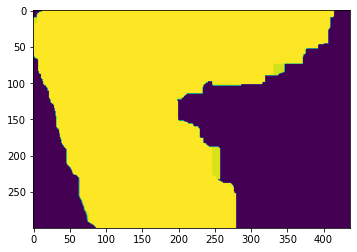

0 [2, 397, 4]
1 [2, 397, 4]
2 [1, 5, 397, 4]
3 [6, 397, 4]
4 [2, 403, 4]
5 [2, 403, 4]
6 [1, 2, 403, 4]
7 [1, 2, 403, 4]
8 [1, 2, 397, 2, 8]
9 [1, 2, 397, 2, 7]
10 [4, 2, 2, 397, 2, 3]
11 [4, 2, 2, 395, 4, 3]
12 [4, 2, 2, 395, 4, 3]
13 [4, 2, 2, 395, 4, 3]
14 [4, 2, 2, 395, 4, 3]
15 [4, 2, 2, 395, 4, 3]
16 [4, 2, 2, 395, 4, 3]
17 [4, 1, 3, 395, 4, 3]
18 [1, 7, 395, 4, 3]
19 [1, 6, 396, 4, 3]
20 [1, 6, 396, 4, 3]
21 [1, 6, 396, 4, 3]
22 [1, 6, 396, 4, 3]
23 [1, 6, 396, 4, 3]
24 [1, 6, 396, 4, 2]
25 [1, 6, 396, 4, 2]
26 [1, 6, 396, 4, 1]
27 [1, 6, 396, 4]
28 [1, 6, 396, 4]
29 [1, 6, 396, 4]
30 [1, 6, 396, 4]
31 [1, 6, 396, 4]
32 [1, 6, 396, 4]
33 [1, 6, 396, 4]
34 [1, 6, 396, 4]
35 [1, 6, 396, 4]
36 [1, 6, 396, 4]
37 [1, 6, 396, 4]
38 [1, 6, 396, 4]
39 [1, 6, 395, 5]
40 [1, 6, 391, 9]
41 [1, 6, 390, 10]
42 [1, 6, 390, 10]
43 [1, 6, 390, 10]
44 [1, 6, 390, 10]
45 [1, 6, 390, 10]
46 [1, 6, 390, 4]
47 [1, 6, 370, 17]
48 [1, 6, 370, 16]
49 [1, 6, 366, 20]
50 [1, 6, 365, 21]
51 [1, 6, 364, 22

In [61]:
import cv2
import image_slicer
import numpy as np
import sys
from image_slicer import slice
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
from itertools import groupby

import math

np.set_printoptions(threshold=sys.maxsize)

img = Image.open('TestImageCrop.png').convert('L')
data = np.array(img)
width, height = img.size
freq = []
slice_size = 0
# ar1 = [0 for x in range(width)]

vertical_center = math.ceil(height / 2)
cropped_image = data[vertical_center - 150 : vertical_center + 150, :]
print(cropped_image.shape)
cropped_height, cropped_width = cropped_image.shape

imgplot = plt.imshow(cropped_image)
plt.show()
# loop for looking into each row of image
for i in range(cropped_height):
#     data[i]    
    x1 = [len(list(v)) for k,v in groupby(cropped_image[i]) if k > 0]
    print(i,x1)
    Sum = np.sum(x1)
#     print(i,Sum)
    freq.append(Sum)
Min = np.amin(np.array(freq))
print(Min)

for i in range(data)
    x1 = [len(list(v)) for k,v in groupby(data[i]) if k > 0]
    Sum = np.sum(x1)
    if(Sum )
    

